In [1]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

In [15]:
salary_query = "SELECT yearID,teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries

,yearID,teamID,total_payroll
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0
...,...,...,...
855,2014,SLN,120693000.0
856,2014,TBA,72689100.0
857,2014,TEX,112255059.0
858,2014,TOR,109920100.0


# Part 1 - Wrangling
## Problem 1

In [31]:
qt = 'SELECT Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, ((CAST(Teams.W as REAL)/Teams.G) * 100) as winning_percentage, sum(Salaries.salary) as total_payroll FROM Salaries, Teams WHERE Teams.teamID == Salaries.teamID GROUP BY Teams.yearID, Teams.teamID'
t = pandas.read_sql(qt, conn)
t

,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
0,CHN,1876,CHC,52,66,78.787879,1.859833e+09
1,CHN,1877,CHC,26,60,43.333333,1.859833e+09
2,CHN,1878,CHC,30,61,49.180328,1.859833e+09
3,CHN,1879,CHC,46,83,55.421687,1.859833e+09
4,CHN,1880,CHC,67,86,77.906977,1.859833e+09
...,...,...,...,...,...,...,...
2083,SLN,2014,STL,90,162,55.555556,1.775631e+09
2084,TBA,2014,TBD,77,162,47.530864,7.681109e+08
2085,TEX,2014,TEX,67,162,41.358025,1.670090e+09
2086,TOR,2014,TOR,83,162,51.234568,1.570875e+09


In [32]:
q = 'SELECT Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, ((CAST(Teams.W as REAL)/Teams.G) * 100) as winning_percentage, sum(Salaries.salary) as total_payroll FROM Teams, Salaries WHERE Teams.teamID == Salaries.teamID AND Teams.yearID == Salaries.yearID GROUP BY Teams.yearID, Teams.teamID'
t = pandas.read_sql(q, conn)
t

,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
0,ATL,1985,ATL,66,162,40.740741,14807000.0
1,BAL,1985,BAL,83,161,51.552795,11560712.0
2,BOS,1985,BOS,81,163,49.693252,10897560.0
3,CAL,1985,ANA,90,162,55.555556,14427894.0
4,CHA,1985,CHW,85,163,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,SLN,2014,STL,90,162,55.555556,120693000.0
854,TBA,2014,TBD,77,162,47.530864,72689100.0
855,TEX,2014,TEX,67,162,41.358025,112255059.0
856,TOR,2014,TOR,83,162,51.234568,109920100.0


,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
2,BOS,1985,BOS,81,163,49.693252,10897560.0
28,BOS,1986,BOS,95,161,59.006211,14402239.0
54,BOS,1987,BOS,78,162,48.148148,10144167.0
80,BOS,1988,BOS,89,162,54.938272,13896092.0
106,BOS,1989,BOS,83,162,51.234568,17481748.0
132,BOS,1990,BOS,88,162,54.320988,20558333.0
158,BOS,1991,BOS,84,162,51.851852,35167500.0
184,BOS,1992,BOS,73,162,45.061728,43610584.0
210,BOS,1993,BOS,80,162,49.382716,37120583.0
238,BOS,1994,BOS,54,115,46.956522,37859084.0


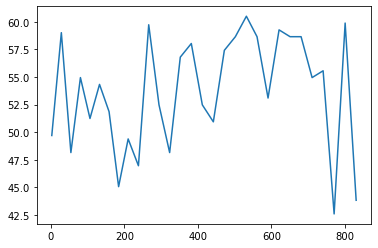

In [33]:
a = t[t.teamID == 'BOS']
a.winning_percentage.plot.line(x='yearID')
a

# Part 2: Exploratory Data Analysis
## Problem 2